# Create models to scale the usability of the model

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#plot stuff
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


#machine learning models
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

## load in train and predict data

In [2]:
usabilityTrainData = pd.read_csv('PathUsababilityTrainData.csv')
usabilityPredictData = pd.read_csv('PathUsababilityPredictData.csv') 

In [3]:
usabilityTrainData

,Unnamed: 0,0,1,2,3,4
0,0,ABOUT1_SBS1A3c7a_950_1280.mp4,D:/Thesis/Video-Auslan-sorted/ABOUT1/ABOUT1_SB...,9,10.433333,3
1,1,ABOUT2_AAPB2c7a_310_800.mp4,D:/Thesis/Video-Auslan-sorted/ABOUT2/ABOUT2_AA...,13,14.125000,2
2,2,ABOUT2_AJPB2c7a_1135_2270.mp4,D:/Thesis/Video-Auslan-sorted/ABOUT2/ABOUT2_AJ...,28,11.273684,3
3,3,ABOUT2_AMGA1c2a_1580_1820.mp4,D:/Thesis/Video-Auslan-sorted/ABOUT2/ABOUT2_AM...,6,13.614035,1
4,4,ABOUT2_AMGA1c2a_730_1170.mp4,D:/Thesis/Video-Auslan-sorted/ABOUT2/ABOUT2_AM...,11,13.614035,3
...,...,...,...,...,...,...
1196,1196,GUFFAW_SPKA1c2a_94460_95534.mp4,D:/Thesis/Video-Auslan-sorted/GUFFAW/GUFFAW_SP...,27,14.893939,2
1197,1197,GUFFAW_SPKA1c2a_97627_98347.mp4,D:/Thesis/Video-Auslan-sorted/GUFFAW/GUFFAW_SP...,18,14.893939,3
1198,1198,GUFFAW_STCA1c2b_11788_13018.mp4,D:/Thesis/Video-Auslan-sorted/GUFFAW/GUFFAW_ST...,31,10.267123,3
1199,1199,HALF_ACAA2c6ii_4780_5050.mp4,D:/Thesis/Video-Auslan-sorted/HALF/HALF_ACAA2c...,7,10.360000,1


In [4]:
usabilityPredictData

,Unnamed: 0,0,1,2,3
0,0,AGAIN_SASA2c7a_91890_92050.mp4,D:/Thesis/Video-Auslan-sorted/AGAIN/AGAIN_SASA...,4,10.689873
1,1,AGAIN_SGMB1c2a_49780_50510.mp4,D:/Thesis/Video-Auslan-sorted/AGAIN/AGAIN_SGMB...,18,11.873874
2,2,AGAIN_SGMB1c2a_88595_88950.mp4,D:/Thesis/Video-Auslan-sorted/AGAIN/AGAIN_SGMB...,9,11.873874
3,3,AGAIN_SLRB1c2b_26330_26550.mp4,D:/Thesis/Video-Auslan-sorted/AGAIN/AGAIN_SLRB...,5,15.806250
4,4,AGAIN_SMGB1c2a_121717_122687.mp4,D:/Thesis/Video-Auslan-sorted/AGAIN/AGAIN_SMGB...,25,16.389313
...,...,...,...,...,...
12696,12696,ZOOM-OFF_STBA1c2b_36540_37860.mp4,D:/Thesis/Video-Auslan-sorted/ZOOM-OFF/ZOOM-OF...,33,18.894737
12697,12697,ZOOM-OFF(7)_AASB2c6iii_31980_32880.mp4,D:/Thesis/Video-Auslan-sorted/ZOOM-OFF(7)/ZOOM...,23,11.617021
12698,12698,ZOOM-OFF(7)_ARGB2c6iii_41620_42200.mp4,D:/Thesis/Video-Auslan-sorted/ZOOM-OFF(7)/ZOOM...,15,13.710526
12699,12699,ZOOM-OFF(S)_MCDB2c6iii_41420_42210.mp4,D:/Thesis/Video-Auslan-sorted/ZOOM-OFF(S)/ZOOM...,20,11.804348


# Data selection

In [19]:
data = np.array(usabilityTrainData)
X = np.array([data.T[3], data.T[4]], dtype=int).T
y = np.array([data.T[5]],dtype=int).T
# convert to usable and unusable
if True:
    newY = []
    for i in y:
        if i >= 3:
            newY.append(1)
        else:
            newY.append(0)
    y = np.array(newY).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((960, 2), (241, 2), (960, 1), (241, 1))

In [20]:
# Save Data
np.savetxt("methedology/X_train.npy", X_train.reshape(X_train.shape[0],-1))
np.savetxt("methedology/X_test.npy", X_test.reshape(X_test.shape[0],-1))
np.savetxt("methedology/y_train.npy", y_train)
np.savetxt("methedology/y_test.npy", y_test)

## Linear Discriminant Analysis
Quadratic discriminant analysis is a classification problem represented by a Bayes Probability distribution 

In [10]:
# data to manipulate
xTrain = X_train
xTest = X_test
yTrain = y_train
yTest = y_test

# Linear Discriminant Analysis
X = xTrain
y = yTrain
clf = LinearDiscriminantAnalysis()
clf.fit(X, y.ravel())

# Error calculation
print("training acuracy: ", clf.score(X, y))
print("validation acuracy: ", clf.score(xTest, yTest))
print("training error: ", 1 - clf.score(X, y))
print("validation error: ", 1- clf.score(xTest, yTest))

# Confusion matrix
yPredictTrain = clf.predict(X)
yPredictTest = clf.predict(xTest)

cfTrain = confusion_matrix(yTrain, yPredictTrain)
cfTest = confusion_matrix(yTest, yPredictTest)
# pd.DataFrame(cfTest).to_csv("kneighbourConfusionMatrix.csv")


training acuracy:  0.5010416666666667
validation acuracy:  0.4896265560165975
training error:  0.4989583333333333
validation error:  0.5103734439834025


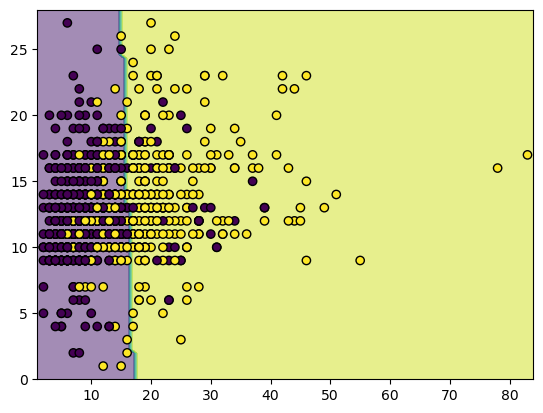

In [65]:
# ploting graph
disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

## Gaussian Naive Bayes
models each as conforming to a Gaussian (normal) distribution

In [67]:
# data to manipulate
xTrain = X_train
xTest = X_test
yTrain = y_train
yTest = y_test

# Gaussian Naive Bayes
X = xTrain
y = yTrain
clf = GaussianNB()
clf.fit(X, y.ravel())

# Error calculation
print("training acuracy: ", clf.score(X, y))
print("validation acuracy: ", clf.score(xTest, yTest))
print("training error: ", 1 - clf.score(X, y))
print("validation error: ", 1- clf.score(xTest, yTest))

# Confusion matrix
yPredictTrain = clf.predict(X)
yPredictTest = clf.predict(xTest)

cfTrain = confusion_matrix(yTrain, yPredictTrain)
cfTest = confusion_matrix(yTest, yPredictTest)
pd.DataFrame(cfTest).to_csv("GaussianNaiveBayesConfusion.csv")

training acuracy:  0.7583333333333333
validation acuracy:  0.7593360995850622
training error:  0.2416666666666667
validation error:  0.2406639004149378


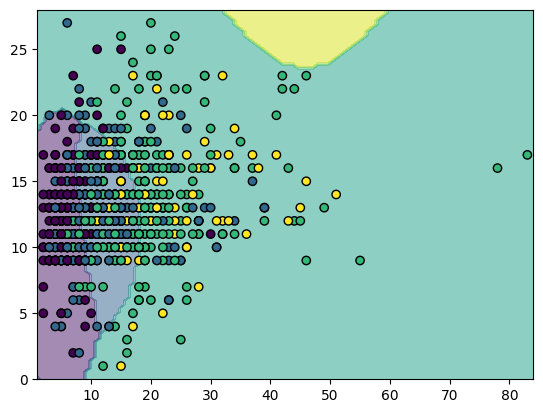

In [49]:
# ploting graph
disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

## KNeighbors Classifier
Classifier implementing the k-nearest neighbors vote.

In [22]:
# data to manipulate
xTrain = X_train
xTest = X_test
yTrain = y_train
yTest = y_test
# make = pd.DataFrame(data1Make)
# make = make.drop(0, axis=1)
# make = make.drop(10, axis=1)

# KNeighbors Classifier
X = xTrain
y = yTrain

bottom = 3
top = 30
step = 1
predictClass = []
kNeighborsPredictions = []
for i in range(bottom, top,step):
    print("\nNumber of Neigbours: ", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X, y)
    kNeighborsPredictions.append(clf)
    # Error calculation
    print("training acuracy: ", clf.score(X, y))
    print("validation acuracy: ", clf.score(xTest, yTest))
    print("training error: ", 1 - clf.score(X, y))
    print("validation error: ", 1- clf.score(xTest, yTest))
    
    # predictClass = clf.predict(make)
    
    # Confusion matrix
    # yPredictTrain = clf.predict(X)
    # yPredictTest = clf.predict(xTest)

    # cfTrain = confusion_matrix(yTrain, yPredictTrain)
    # cfTest = confusion_matrix(yTest, yPredictTest)
# predictdf = pd.concat([make , pd.DataFrame(predictClass,columns=['class'])] , axis = 1)
# predictdf.to_csv("predict.csv")
# pd.DataFrame(cfTest).to_csv("kneighbourConfusionMatrix.csv")


Number of Neigbours:  3
training acuracy:  0.809375
validation acuracy:  0.7717842323651453
training error:  0.19062500000000004
validation error:  0.22821576763485474

Number of Neigbours:  4
training acuracy:  0.8020833333333334
validation acuracy:  0.7759336099585062
training error:  0.19791666666666663
validation error:  0.22406639004149376

Number of Neigbours:  5
training acuracy:  0.8135416666666667
validation acuracy:  0.7593360995850622
training error:  0.18645833333333328
validation error:  0.2406639004149378

Number of Neigbours:  6


c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

training acuracy:  0.80625
validation acuracy:  0.7302904564315352
training error:  0.19374999999999998
validation error:  0.26970954356846477

Number of Neigbours:  7
training acuracy:  0.8114583333333333
validation acuracy:  0.7634854771784232
training error:  0.18854166666666672
validation error:  0.2365145228215768

Number of Neigbours:  8
training acuracy:  0.8104166666666667
validation acuracy:  0.7593360995850622


c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


training error:  0.18958333333333333
validation error:  0.2406639004149378

Number of Neigbours:  9
training acuracy:  0.8125
validation acuracy:  0.7717842323651453
training error:  0.1875
validation error:  0.22821576763485474

Number of Neigbours:  10
training acuracy:  0.8114583333333333
validation acuracy:  0.7634854771784232
training error:  0.18854166666666672
validation error:  0.2365145228215768

Number of Neigbours:  11


c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


training acuracy:  0.809375
validation acuracy:  0.7634854771784232
training error:  0.19062500000000004
validation error:  0.2365145228215768

Number of Neigbours:  12
training acuracy:  0.8020833333333334
validation acuracy:  0.7551867219917012
training error:  0.19791666666666663
validation error:  0.24481327800829877

Number of Neigbours:  13
training acuracy:  0.8052083333333333
validation acuracy:  0.7842323651452282
training error:  0.1947916666666667
validation error:  0.2157676348547718

Number of Neigbours:  14


c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


training acuracy:  0.8010416666666667
validation acuracy:  0.7717842323651453
training error:  0.19895833333333335
validation error:  0.22821576763485474

Number of Neigbours:  15
training acuracy:  0.80625
validation acuracy:  0.7842323651452282
training error:  0.19374999999999998
validation error:  0.2157676348547718

Number of Neigbours:  16
training acuracy:  0.8010416666666667
validation acuracy:  0.7717842323651453


c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


training error:  0.19895833333333335
validation error:  0.22821576763485474

Number of Neigbours:  17
training acuracy:  0.8052083333333333
validation acuracy:  0.7717842323651453
training error:  0.1947916666666667
validation error:  0.22821576763485474

Number of Neigbours:  18
training acuracy:  0.8020833333333334
validation acuracy:  0.7759336099585062
training error:  0.19791666666666663


c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


validation error:  0.22406639004149376

Number of Neigbours:  19
training acuracy:  0.8041666666666667
validation acuracy:  0.7759336099585062
training error:  0.1958333333333333
validation error:  0.22406639004149376

Number of Neigbours:  20
training acuracy:  0.803125
validation acuracy:  0.7676348547717843
training error:  0.19687500000000002
validation error:  0.23236514522821572

Number of Neigbours:  21
training acuracy:  0.7989583333333333


c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


validation acuracy:  0.7676348547717843
training error:  0.20104166666666667
validation error:  0.23236514522821572

Number of Neigbours:  22
training acuracy:  0.8
validation acuracy:  0.7717842323651453
training error:  0.19999999999999996
validation error:  0.22821576763485474

Number of Neigbours:  23
training acuracy:  0.8
validation acuracy:  0.7759336099585062
training error:  0.19999999999999996
validation error:  0.22406639004149376

Number of Neigbours:  24


c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


training acuracy:  0.7989583333333333
validation acuracy:  0.7676348547717843
training error:  0.20104166666666667
validation error:  0.23236514522821572

Number of Neigbours:  25
training acuracy:  0.796875
validation acuracy:  0.7717842323651453
training error:  0.203125
validation error:  0.22821576763485474

Number of Neigbours:  26
training acuracy:  0.7958333333333333
validation acuracy:  0.7800829875518672
training error:  0.20416666666666672
validation error:  0.21991701244813278

Number of Neigbours:  27


c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


training acuracy:  0.79375
validation acuracy:  0.7759336099585062
training error:  0.20625000000000004
validation error:  0.22406639004149376

Number of Neigbours:  28
training acuracy:  0.7947916666666667
validation acuracy:  0.7759336099585062
training error:  0.20520833333333333
validation error:  0.22406639004149376

Number of Neigbours:  29
training acuracy:  0.7916666666666666
validation acuracy:  0.7800829875518672
training error:  0.20833333333333337
validation error:  0.21991701244813278


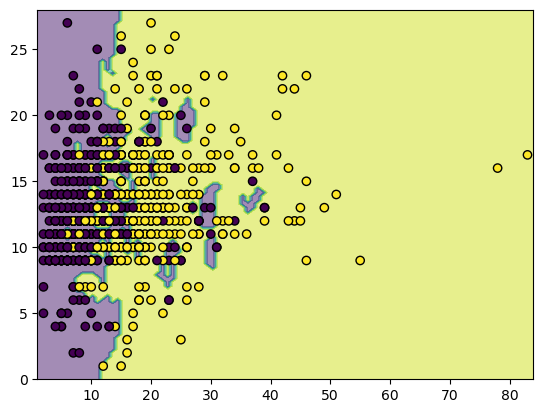

In [24]:
import pickle
n = 0
for i in range(bottom, top,step):
    # ploting graph
    if i == 18:
        disp = DecisionBoundaryDisplay.from_estimator(kNeighborsPredictions[n], X, response_method="predict", alpha=0.5)
        disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
        with open('./methedology/KNNdisp.pkl', 'wb') as file:
            pickle.dump(disp, file)


        n += 1

## DecisionTreeClassifier
A decision tree classifier.

In [27]:
# data to manipulate
xTrain = X_train
xTest = X_test
yTrain = y_train
yTest = y_test


# Quadratic model
X = xTrain
y = yTrain
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)

# Error calculation
print("training acuracy: ", clf.score(X, y))
print("validation acuracy: ", clf.score(xTest, yTest))
print("training error: ", 1 - clf.score(X, y))
print("validation error: ", 1- clf.score(xTest, yTest))

# Confusion matrix
yPredictTrain = clf.predict(X)
yPredictTest = clf.predict(xTest)

cfTrain = confusion_matrix(yTrain, yPredictTrain)
cfTest = confusion_matrix(yTest, yPredictTest)
# pd.DataFrame(cfTest).to_csv("DecisionTreeClassifier.csv")

training acuracy:  0.8458333333333333
validation acuracy:  0.7759336099585062
training error:  0.15416666666666667
validation error:  0.22406639004149376


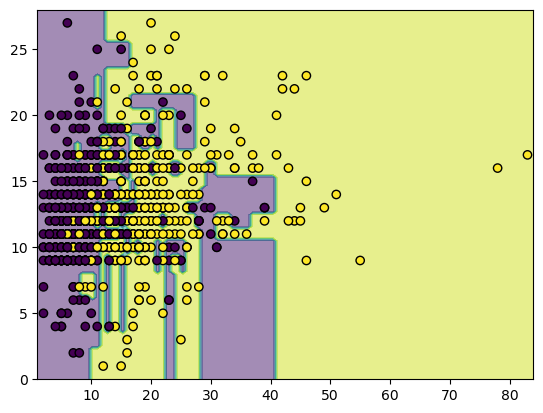

In [28]:
# ploting graph
disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

with open('./methedology/DTCdisp.pkl', 'wb') as file:
            pickle.dump(disp, file)

## RandomForestClassifier
A random forest classifier.

In [29]:
# data to manipulate
xTrain = X_train
xTest = X_test
yTrain = y_train
yTest = y_test


# RandomForestClassifier
X = xTrain
y = yTrain
clf = RandomForestClassifier(n_estimators=10000, random_state=0)
clf.fit(X, y.ravel())

# Error calculation
print("training acuracy: ", clf.score(X, y))
print("validation acuracy: ", clf.score(xTest, yTest))
print("training error: ", 1 - clf.score(X, y))
print("validation error: ", 1- clf.score(xTest, yTest))

# Confusion matrix
yPredictTrain = clf.predict(X)
yPredictTest = clf.predict(xTest)

cfTrain = confusion_matrix(yTrain, yPredictTrain)
cfTest = confusion_matrix(yTest, yPredictTest)
# pd.DataFrame(cfTest).to_csv("DecisionTreeClassifier.csv")

training acuracy:  0.8458333333333333
validation acuracy:  0.7966804979253111
training error:  0.15416666666666667
validation error:  0.20331950207468885


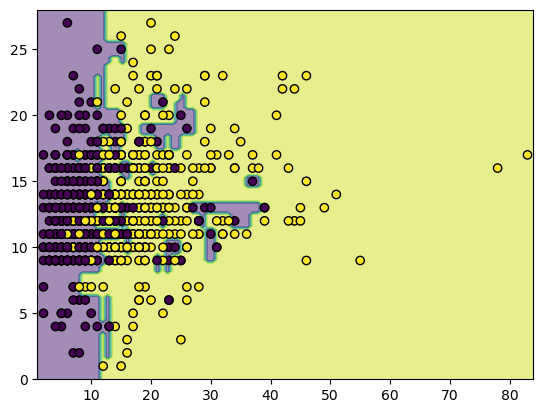

In [30]:
# ploting graph
disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

with open('./methedology/RFCdisp.pkl', 'wb') as file:
    pickle.dump(disp, file)

## MLP NeuralNetwork
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic gradient descent.

In [86]:
# data to manipulate
xTrain = X_train
xTest = X_test
yTrain = y_train
yTest = y_test

# MLP NeuralNetwork
X = xTrain
y = yTrain

activation = ['identity', 'logistic', 'tanh', 'relu']
classifiers = []
for func in activation:
    clf = MLPClassifier(random_state=1, max_iter=9999999, activation=func, hidden_layer_sizes=(1000,200))
    clf.fit(X, y)
    classifiers.append(clf)
classifiers

c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1091: DataConversionWarning: A colu

[MLPClassifier(activation='identity', hidden_layer_sizes=(1000, 200),
               max_iter=9999999, random_state=1),
 MLPClassifier(activation='logistic', hidden_layer_sizes=(1000, 200),
               max_iter=9999999, random_state=1),
 MLPClassifier(activation='tanh', hidden_layer_sizes=(1000, 200),
               max_iter=9999999, random_state=1),
 MLPClassifier(hidden_layer_sizes=(1000, 200), max_iter=9999999, random_state=1)]

identity  training acuracy:  0.7791666666666667
identity  validation acuracy:  0.7717842323651453
identity  training error:  0.22083333333333333
identity  validation error:  0.22821576763485474
logistic  training acuracy:  0.790625
logistic  validation acuracy:  0.7593360995850622
logistic  training error:  0.20937499999999998
logistic  validation error:  0.2406639004149378
tanh  training acuracy:  0.7895833333333333
tanh  validation acuracy:  0.7593360995850622
tanh  training error:  0.2104166666666667
tanh  validation error:  0.2406639004149378
relu  training acuracy:  0.790625
relu  validation acuracy:  0.7634854771784232
relu  training error:  0.20937499999999998
relu  validation error:  0.2365145228215768


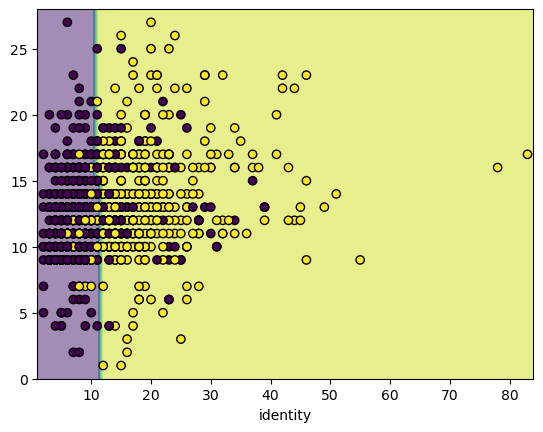

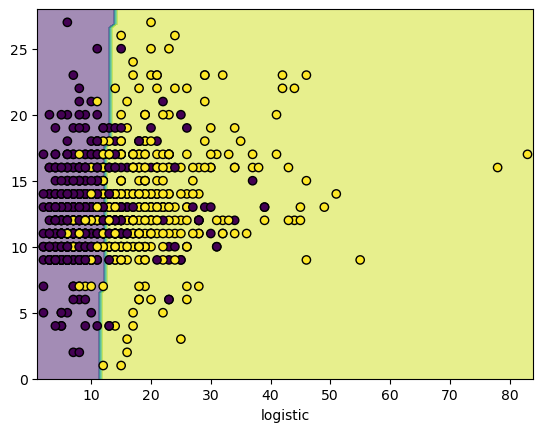

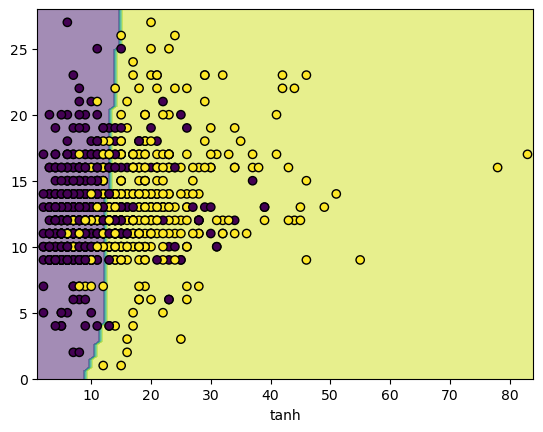

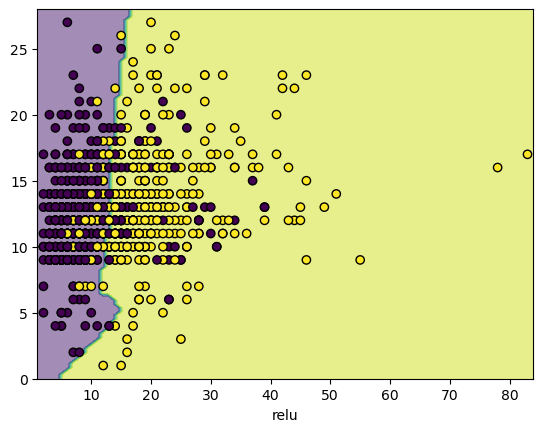

In [87]:
# Error calculation
it = 0
historgramData = []
for func in activation:
    clf = classifiers[it]
    print(func, " training acuracy: ", clf.score(X, y))
    print(func, " validation acuracy: ", clf.score(xTest, yTest))
    print(func, " training error: ", 1 - clf.score(X, y))
    print(func, " validation error: ", 1- clf.score(xTest, yTest))
    historgramData.append(clf.score(xTest, yTest))
    
    # Confusion matrix
    yPredictTrain = clf.predict(X)
    yPredictTest = clf.predict(xTest)
    
#     cfTrain = confusion_matrix(yTrain, yPredictTrain)
#     cfTest = confusion_matrix(yTest, yPredictTest)
#     pd.DataFrame(cfTest).to_csv(func+"MLP.csv")
    
#     # ploting graph
    disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", alpha=0.5, xlabel=func)
    disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
#     plt.show()
    it += 1

In [70]:
plt.figure("Accuracy based on activation function")
plt.bar(activation, height=historgramData)
plt.show()

NameError: name 'plt' is not defined

## AdaBoostClassifier
An AdaBoost [1] classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [90]:
# data to manipulate
xTrain = X_train
xTest = X_test
yTrain = y_train
yTest = y_test

# MLP AdaBoostClassifier
X = xTrain
y = yTrain
clf = AdaBoostClassifier(n_estimators=6000, random_state=0)
clf.fit(X, y)

c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(n_estimators=6000, random_state=0)

In [91]:
# Error calculation
print("training acuracy: ", clf.score(X, y))
print("validation acuracy: ", clf.score(xTest, yTest))
print("training error: ", 1 - clf.score(X, y))
print("validation error: ", 1- clf.score(xTest, yTest))

# Confusion matrix
yPredictTrain = clf.predict(X)
yPredictTest = clf.predict(xTest)

cfTrain = confusion_matrix(yTrain, yPredictTrain)
cfTest = confusion_matrix(yTest, yPredictTest)
# pd.DataFrame(cfTest).to_csv("AdaBoostClassifier.csv")

training acuracy:  0.790625
validation acuracy:  0.7634854771784232
training error:  0.20937499999999998
validation error:  0.2365145228215768


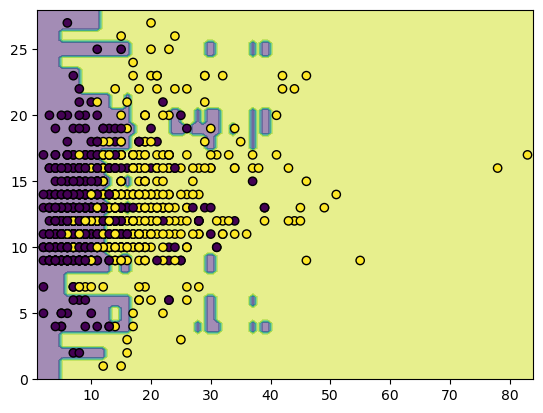

In [92]:
# ploting graph
disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

# Predict Data

## Knn with 18 nearest neighbours

In [98]:
# data to manipulate
xTrain = X_train
xTest = X_test
yTrain = y_train
yTest = y_test
# make = pd.DataFrame(data1Make)
# make = make.drop(0, axis=1)
# make = make.drop(10, axis=1)

# KNeighbors Classifier
X = xTrain
y = yTrain

clf = KNeighborsClassifier(n_neighbors=18)
clf.fit(X, y)

# Error calculation
print("training acuracy: ", clf.score(X, y))
print("validation acuracy: ", clf.score(xTest, yTest))
print("training error: ", 1 - clf.score(X, y))
print("validation error: ", 1- clf.score(xTest, yTest))

training acuracy:  0.575
validation acuracy:  0.5518672199170125
training error:  0.42500000000000004
validation error:  0.4481327800829875


c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [109]:
data = np.array(usabilityPredictData)
X_predict = np.array([data.T[3], data.T[4]], dtype=int).T

vidToUsability = {}
y = []
for x in X_predict:
    y.append(clf.predict(x.reshape(1,-1)))
y = np.array(y)
vidToUsability = {data.T[1][i]:y[i][0] for i in range(len(y))}

In [111]:
data = np.array(usabilityTrainData)
for i in range(len(data)):
    vidToUsability[data.T[1][i]] = data.T[5][i]

In [112]:
print(len(vidToUsability))
numUsablility = {1:0,2:0,3:0,4:0}
for key, value in vidToUsability.items():
    numUsablility[value] += 1
numUsablility


13902


{1: 2994, 2: 5011, 3: 5564, 4: 333}

## save to new usability data csv

In [113]:
saveLocation = "D:/Thesis/Video-Auslan-sorted"
dataFrame = pd.DataFrame
videoTitle = []
videoLocation = []
videoUsability = []
count = 0
for folder in os.listdir(saveLocation):
    for video in os.listdir(saveLocation + '/' + folder):
        videoTitle.append(video)
        videoLocation.append(saveLocation + '/' + folder + '/' + video)
        try:
            videoUsability.append(vidToUsability[video])
        except:
            videoUsability.append(0)
dataFrame = pd.DataFrame(np.array([videoTitle, videoLocation, videoUsability]).T)
dataFrame.to_csv('usabilityKNNPredicted.csv')

In [11]:
import pickle

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)
with open('./methedology/KNN.pkl', 'wb') as file:
    pickle.dump(knn, file)

c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
with open('./methedology/DTC.pkl', 'wb') as file:
    pickle.dump(dtc, file)

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10000, random_state=0)
rfc.fit(X_train, y_train)
with open('./methedology/RFC.pkl', 'wb') as file:
    pickle.dump(rfc, file)

C:\Users\KAI\AppData\Local\Temp\ipykernel_21572\1963527499.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)
